## Fraud Detection

### Explanatory data analysis


#### Importing necessary libraries

In [1]:
import os 
import sys
import pandas as pd
import sidetable as stb
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
sys.path.append(os.path.abspath('../scripts'))

from Utils import DataUtils
from  Plotting import Plots

utils = DataUtils()
plots = Plots()

In [3]:
creditCard_data = utils.load_data('creditcard.csv')
fraud_data = utils.load_data('Fraud_Data.csv')
Ip_data = utils.load_data('IpAddress_to_Country.csv')

2024-10-22 02:38 - DEBUG :: Loading data from file...
2024-10-22 02:38 - INFO :: Loading creditcard.csv took 1.67 seconds


2024-10-22 02:38 - DEBUG :: Loading data from file...
2024-10-22 02:38 - INFO :: Loading Fraud_Data.csv took 0.38 seconds


2024-10-22 02:38 - DEBUG :: Loading data from file...
2024-10-22 02:38 - INFO :: Loading IpAddress_to_Country.csv took 0.1 seconds




#### Exploring the data

In [4]:
# credit Card data
creditCard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Observation**
- As we can see the creditCard dataset contains numerical values

In [5]:
creditCard_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
creditCard_data[['Class', 'Amount', 'Time','V1']].stb.counts()

,count,unique,most_freq,most_freq_count,least_freq,least_freq_count
Class,284807,2,0.000000,284315,1.000000,492
Amount,284807,32767,1.000000,13688,336.330000,1
Time,284807,124592,163152.000000,36,172767.000000,1
V1,284807,275663,1.245674,77,-1.015042,1


**Observation**
- Here from the above dataframe we can see that the class column is not equal: the number of 0(non fraudulent transacion) is greater than the fraudulent transaction.

In [7]:
# Fraud Card data
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


**Observation**
- In the Fraud_Data we can see that there are some columns that don't have the proper Dtypes. These columns are:
    * signup_time
    * Purchase_time
    * ip_address

In [8]:
fraud_data.describe()

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [9]:
fraud_data.stb.counts()

,count,unique,most_freq,most_freq_count,least_freq,least_freq_count
sex,151112,2,M,88293,F,62819
class,151112,2,0,136961,1,14151
source,151112,3,SEO,60615,Direct,30616
browser,151112,5,Chrome,61432,Opera,3676
age,151112,58,32,6666,73,1
purchase_value,151112,122,28,3328,123,1
device_id,151112,137956,ITUMJCKWEYNDD,20,GCYGGWEYXYVEW,1
ip_address,151112,143512,2050963888.16442,20,1353476215.96063,1
purchase_time,151112,150679,2015-07-17 23:22:55,3,2015-08-30 08:09:07,1
user_id,151112,151112,138208,1,138208,1


**Observaiton**
- From the table above we can conclude that: 
    * the number of male is greater than the number of female in our fraud dataset.
    * In the dataset the most frequent source is SEO and the least frequent is Direct
    * Most used browser is Chrome and least used browser is Opera
    * Most of the customers age is 28
    * High frequency of trasaction happened on the date `2015-07-17 23:22:55`	
    * Here we can see that user_id could not be used as a unique idenifer.

- To uniquely identify a user: 
    * Given the characteristics of the data fields in our dataset, it is evident that the Device ID possesses the fewest unique values, potentially serving as a candidate for user representation. However, it is crucial to note that reliance solely on Device ID could lead to issues, particularly if multiple devices share the same identifier.

    * Considering this, the IP address emerges as a more reliable and distinct identifier for users within the dataset. Its uniqueness across user interactions makes it a suitable choice for individual identification.

    * User ID, despite its apparent role as an identifier, aligns closely with the number of rows in the dataset, diminishing its effectiveness in uniquely distinguishing users.

In [10]:
# Ip address to country data
Ip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


**Observation**
- The IpAddres to country dataset contains incorrect Dtype:
    * lower_bound_ip_address should be `int`

In [11]:
Ip_data.describe()

,lower_bound_ip_address,upper_bound_ip_address
count,1.388460e+05,1.388460e+05
mean,2.724532e+09,2.724557e+09
std,8.975215e+08,8.974979e+08
min,1.677722e+07,1.677747e+07
25%,1.919930e+09,1.920008e+09
50%,3.230887e+09,3.230888e+09
75%,3.350465e+09,3.350466e+09
max,3.758096e+09,3.758096e+09


In [12]:
Ip_data.stb.counts()

,count,unique,most_freq,most_freq_count,least_freq,least_freq_count
country,138846,235,United States,46868,Tokelau,1
lower_bound_ip_address,138846,138846,3758096128.0,1,3758096128.0,1
upper_bound_ip_address,138846,138846,3758096383,1,3758096383,1


**Observation**
- The most frequent country is United states

#### Handling missing values

In [13]:
creditCard_data.isna().sum().sum()

np.int64(0)

In [14]:
fraud_data.stb.missing()

,missing,total,percent
user_id,0,151112,0.0
signup_time,0,151112,0.0
purchase_time,0,151112,0.0
purchase_value,0,151112,0.0
device_id,0,151112,0.0
source,0,151112,0.0
browser,0,151112,0.0
sex,0,151112,0.0
age,0,151112,0.0
ip_address,0,151112,0.0


In [15]:
Ip_data.stb.missing()

,missing,total,percent
lower_bound_ip_address,0,138846,0.0
upper_bound_ip_address,0,138846,0.0
country,0,138846,0.0


**Observation**
- As shown above all the datasets don't contain any missing values.

### Remove duplicates



In [96]:
utils.data_info(creditCard_data)


Dataset Overview
---------------------
- Total rows: 284807
- Total columns: 31

- Number of duplicated rows are: 1081
- Percentage of duplicated rows are: 0.38 %


No missing data found in the dataset.

Detailed Missing Data Information
Empty DataFrame
Columns: [Missing Values, Missing Percentage, Data Types]
Index: []


,Missing Values,Missing Percentage,Data Types


**Observation**
- As one can see there are 1081 columns that are duplicated so we need to drop them

In [4]:
creditCard_data.drop_duplicates(inplace=True)

In [18]:
utils.data_info(fraud_data)


Dataset Overview
---------------------
- Total rows: 151112
- Total columns: 11

No Duplicated data found in the dataset.

No missing data found in the dataset.

Detailed Missing Data Information
Empty DataFrame
Columns: [Missing Values, Missing Percentage, Data Types]
Index: []


,Missing Values,Missing Percentage,Data Types


In [19]:
utils.data_info(Ip_data)


Dataset Overview
---------------------
- Total rows: 138846
- Total columns: 3

No Duplicated data found in the dataset.

No missing data found in the dataset.

Detailed Missing Data Information
Empty DataFrame
Columns: [Missing Values, Missing Percentage, Data Types]
Index: []


,Missing Values,Missing Percentage,Data Types


#### Correct data types


In [5]:
# fraud data columns that need to be changed to correct formats
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])
fraud_data['ip_address'] = fraud_data['ip_address'].astype('int64')

In [6]:
# Ip data
Ip_data['lower_bound_ip_address'] = Ip_data['lower_bound_ip_address'].astype('int64')

#### Univariate analysis

2024-10-18 10:51 - DEBUG :: Plot to visualize univariant columns...
2024-10-18 10:51 - INFO :: It took 6.58 seconds to plot histograms


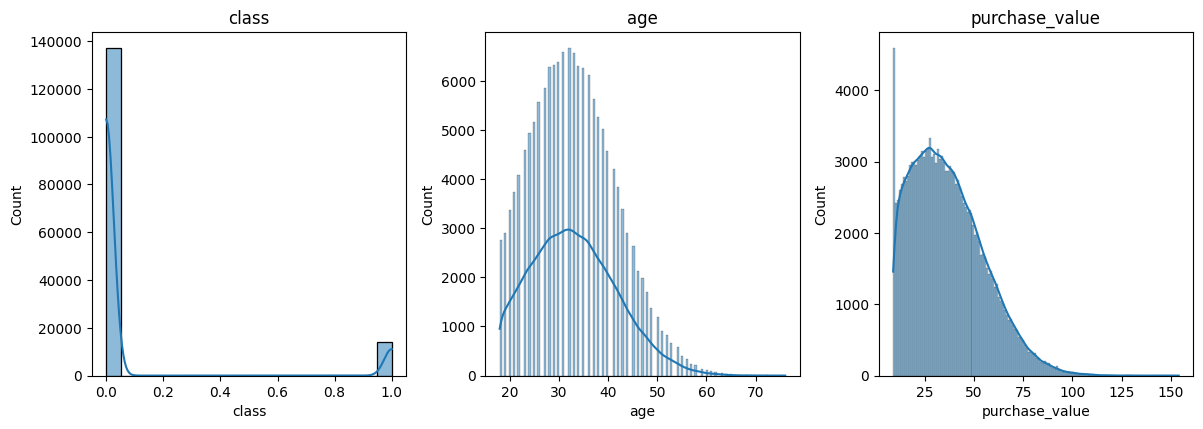

In [22]:
# Univariant visualization for Fraud dataset
plots.num_univariant_visualization(fraud_data[['class', 'age', 'purchase_value']])

**Key Insights:**
- *Class imbalance* is evident in the first plot, which could impact machine learning models.
- The *age distribution* suggests that most of the users are younger, concentrated in their 30s.
- The purchase value distribution indicates that while many users make purchases in the lower to mid-range, there are a few high spenders, possibly outliers, driving the long tail.

2024-10-18 10:51 - DEBUG :: Plot to visualize univariant columns...
2024-10-18 10:53 - INFO :: It took 120.96 seconds to plot histograms


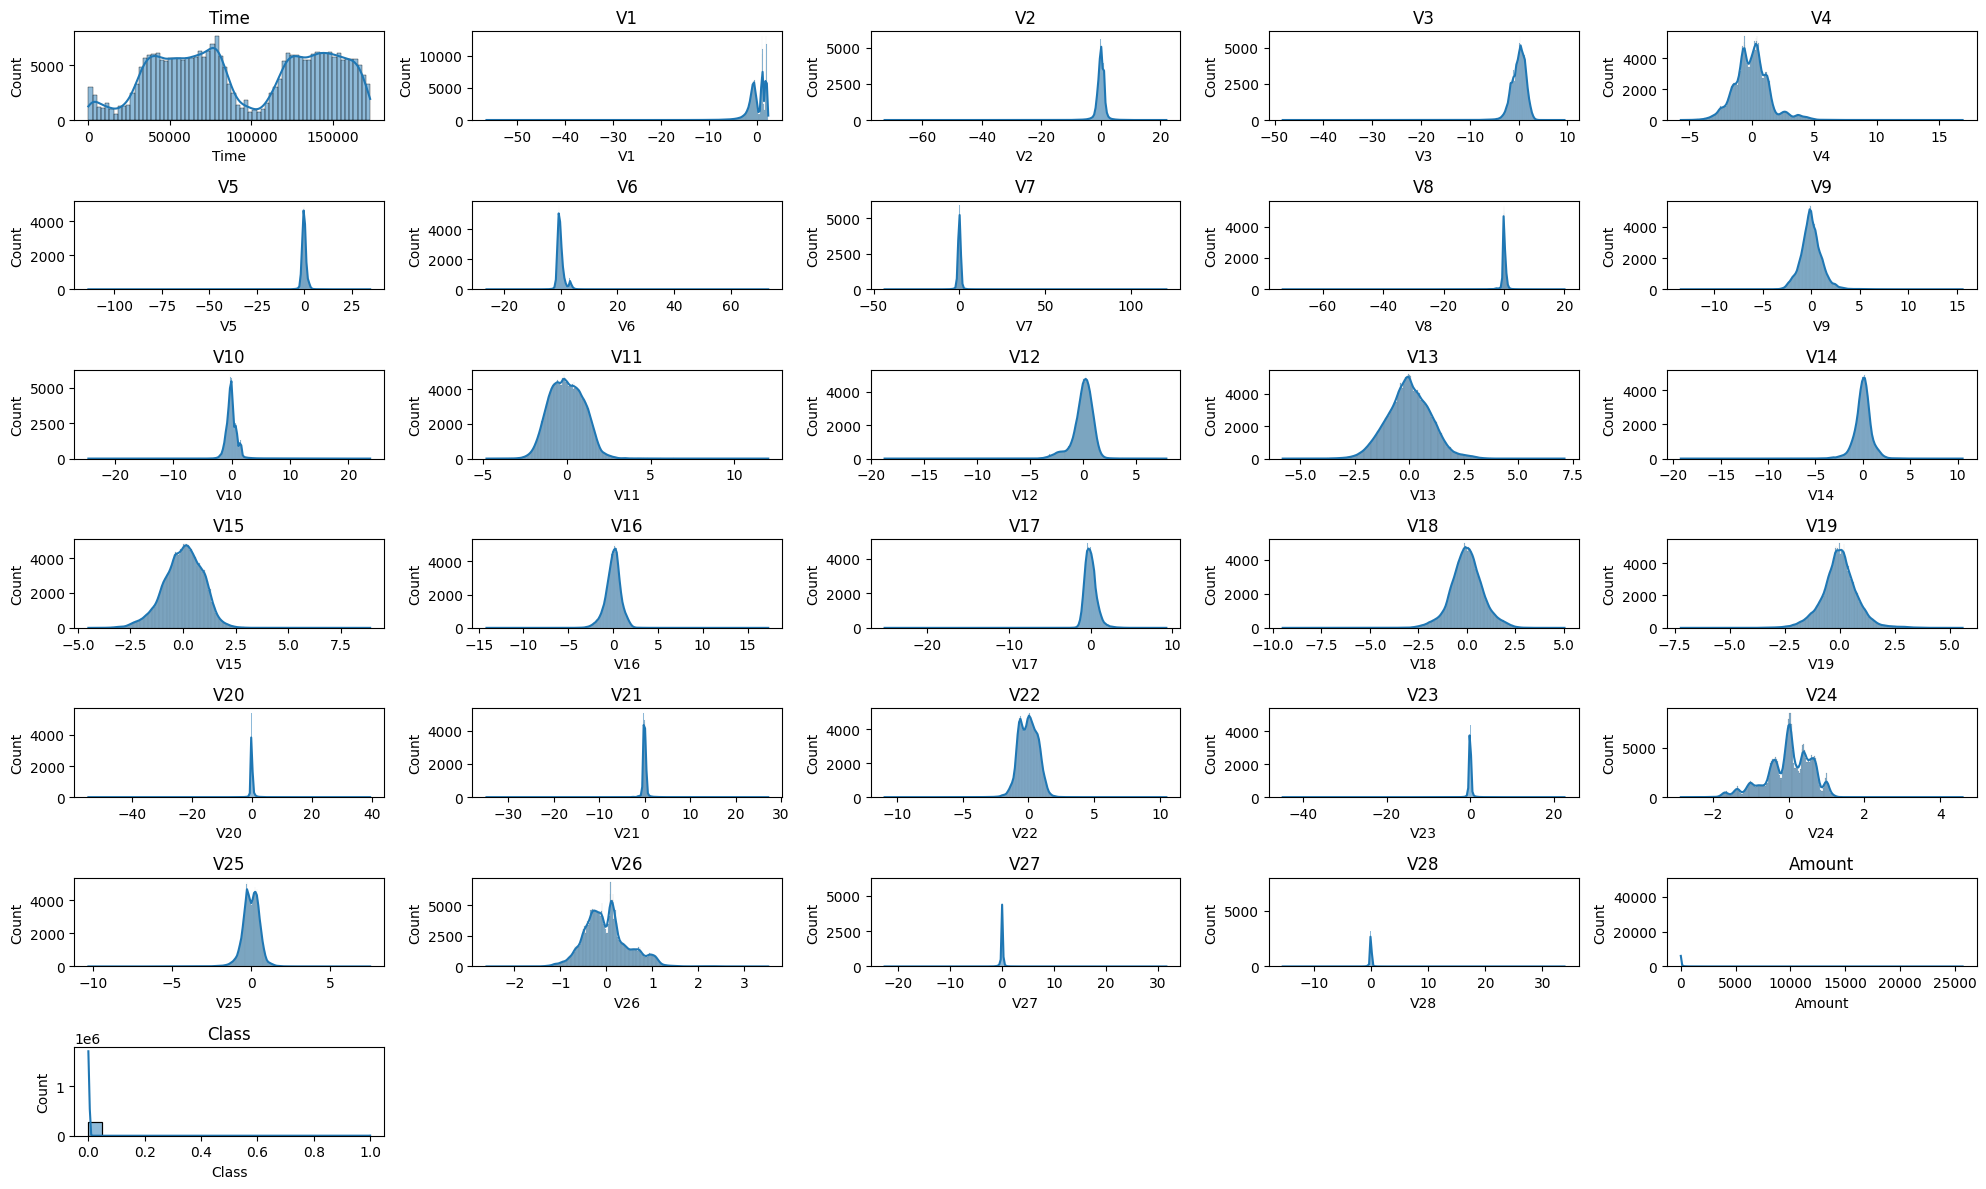

In [23]:
# Univariant visualization for credit card dataset
plots.num_univariant_visualization(creditCard_data)

**Observaiton**
- *Time*: The distribution is multimodal, showing periods of higher transaction volume at different times. It suggests that transactions occur in cycles or bursts. 
    * further seasonality or timeseries analysis is needed
- *V1 to V28*: The distributions suggest that most of the transformed data points are concentrated near zero. This shows that the data has been normalized

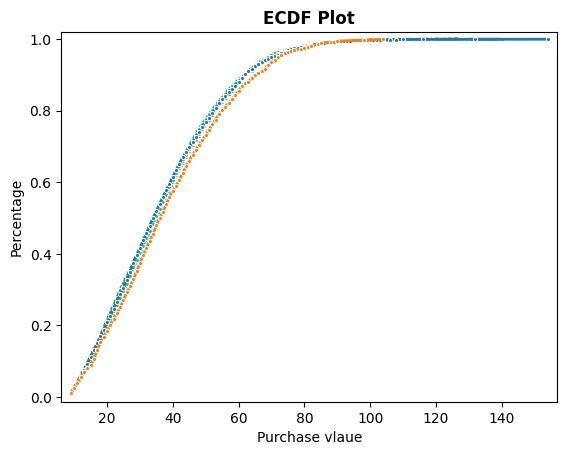

In [22]:
# ECDF plot for Purchase value for each month
# Timeseries analysis for a timeframe of a month

months = fraud_data['purchase_time'].dt.month.unique()

for month in months:
    plots.plot_ecdf(fraud_data[fraud_data['purchase_time'].dt.month == month]['purchase_value'])

**Observation**
- As it shown using the ECDF graph the purchase value for each month is almost the same
- Around 60% of purchase value is around 40

#### Bivariant analysis

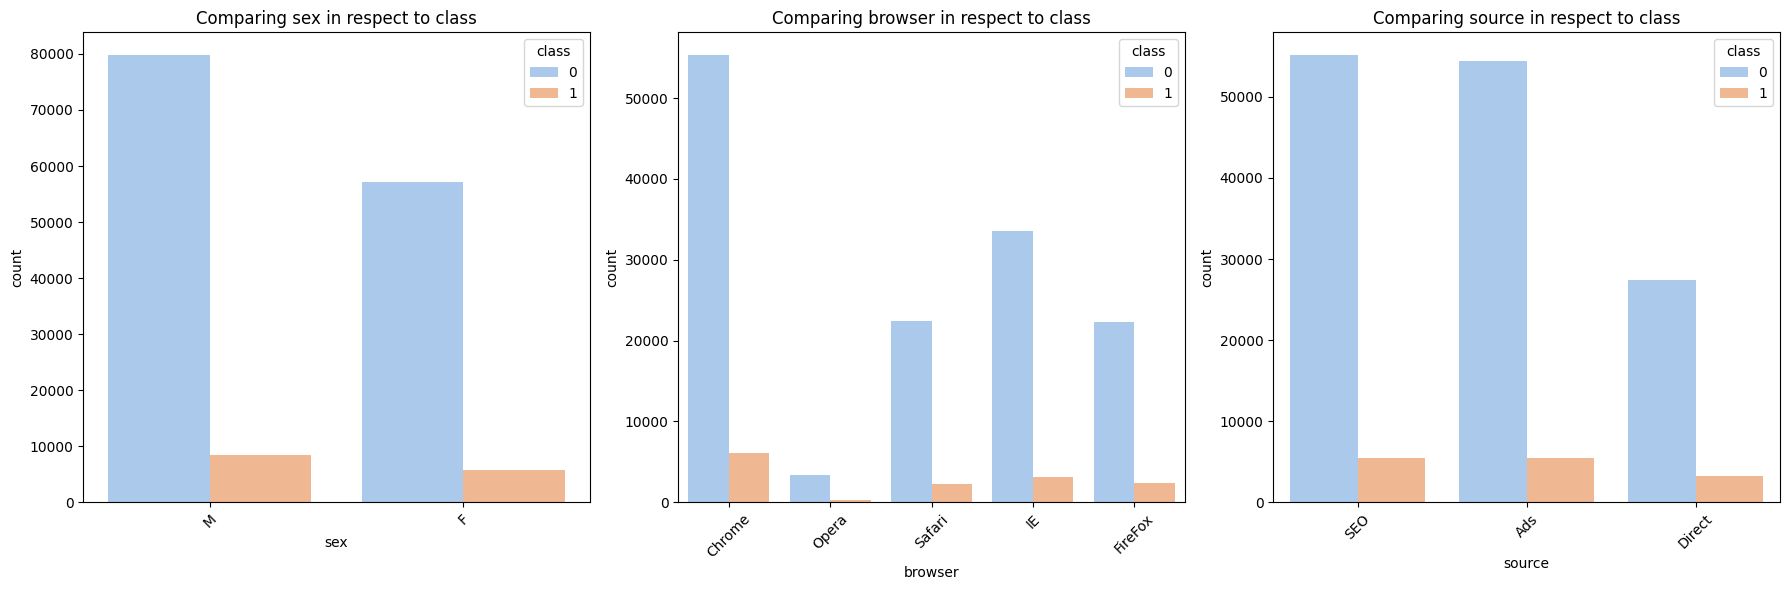

In [56]:
cols = ['sex','browser', 'source']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
for i, col in enumerate(cols):
    plots.bivariant_distribution(fraud_data, col, 'class', axes[i])

plt.tight_layout()
plt.show()        

**Key Observations:**

- Comparing Sex and Class:

    * The bar plot shows that the majority of individuals in both classes are male (M), with a smaller proportion being female (F).
    * While the sample sizes are different for the two classes, the distribution of sex appears to be relatively similar between them.
- Comparing Browser and Class:

    * The bar plot reveals that the most common browser among individuals in both classes is "Chrome."
    * There are some differences in the distribution of other browsers between the two classes, with "Opera" and "Safari" being more prevalent in class 1, and "Firefox" and "IE" being more prevalent in class 0.
- Comparing Source and Class:

    * The bar plot indicates that "Direct" is the most common source for individuals in both classes.
There are some differences in the distribution of other sources between the two classes, with "SEO" and "Ads" being more prevalent in class 1, and "Direct" and "Organic" being more prevalent in class 0.

#### Merge Datasets for Geolocation Analysis

In [7]:
fraud_data['Country'] = fraud_data['ip_address'].apply(lambda x : utils.get_country(x, Ip_data))

In [12]:
utils.data_info(fraud_data)


Dataset Overview
---------------------
- Total rows: 151112
- Total columns: 21

No Duplicated data found in the dataset.

Missing Data Summary
------------------------
- Columns with missing values: 1

- Column(s) with the most missing values: `Country`
- Number of columns with more than 50% missing values: `0`

No columns with more than 50% missing values.

Detailed Missing Data Information
         Missing Values  Missing Percentage Data Types
Country           21966               14.54     object


,Missing Values,Missing Percentage,Data Types
Country,21966,14.54,object


**Observation**
- Since the missing values are caused by the Ip addresses that were not in the range we can lable the missing values with `other` to indicate that countrys that were not found on th IpAddress to country dataset

In [8]:
fraud_data.fillna('Other', inplace=True)

#### Feature engineering

In [9]:
# Time based features
fraud_data = utils.time_features(fraud_data, 'purchase_time')

In [10]:
trasaction_frequency = fraud_data.groupby(by='device_id').size().reset_index(name='trasaction_frequency')
fraud_data = fraud_data.merge(trasaction_frequency, on='device_id', how='inner')
fraud_data['velocity'] = (fraud_data['purchase_time'] - fraud_data['signup_time']).dt.seconds 

#### Geographical Analysis

In [11]:
fraud_country = fraud_data.loc[fraud_data['class'] == 1].groupby(by='Country').size().reset_index(name='Fraud_Count')

# to make the naming convention the same as geopandas
fraud_country = fraud_country.replace({'United States' : 'United States of America'})

In [18]:
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"

gdf = gpd.read_file(url)

# merge the two datasets together
merged = gdf.merge(fraud_country, how='left', left_on='SOVEREIGNT', right_on='Country')
merged['Fraud_Count'] = merged['Fraud_Count'].fillna(0)

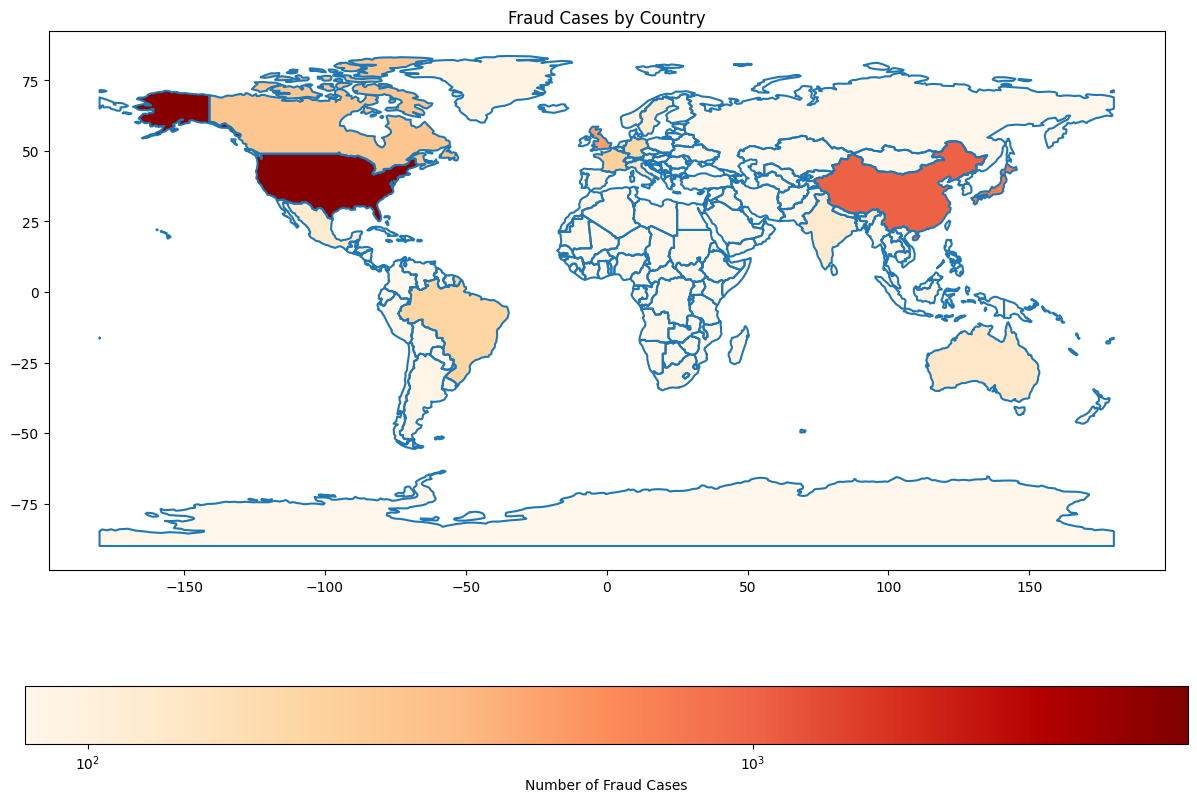

In [27]:
plots.geo_analysis(merged)

**Observation**
- This image is a heatmap representing the number of fraud cases by country, with color intensity corresponding to the number of cases:
    * USA Dominates Fraud Cases: The United States is the most significant contributor to fraud cases, indicated by the darkest red color. This could reflect the size of the dataset being used or higher fraud rates in the region.
    * Other Significant Regions: China, Japan and some parts of Europe, such as the UK and Germany, also show a moderate number of fraud cases (lighter shades of red/orange). The rest of the world (South America, Africa, and Australia) shows significantly fewer cases.

#### Timeseries analysis

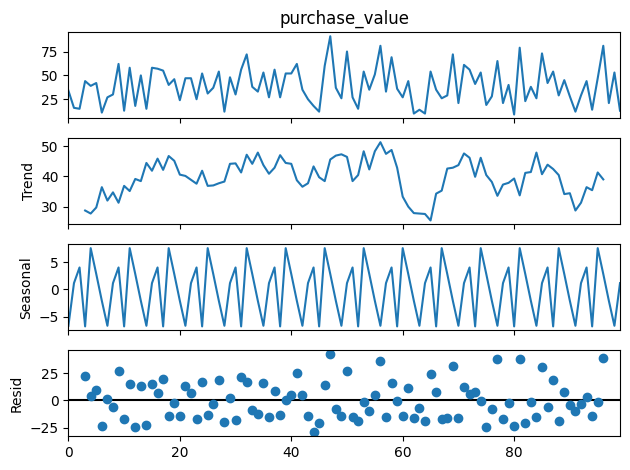

In [24]:
plots.timeseries_analysis(fraud_data, period=7, sample_size=100)

**Key insights**
- Trend: the trend appears to be increasing over time, suggesting that the purchase_value has been generally rising with the exception of some dips.
- Sesonality: Seasonal component captures the periodic fluctuations in the data. The plot shows a clear seasonal pattern, with the purchase_value tending to increase at certain points in the week and decrease at certain points

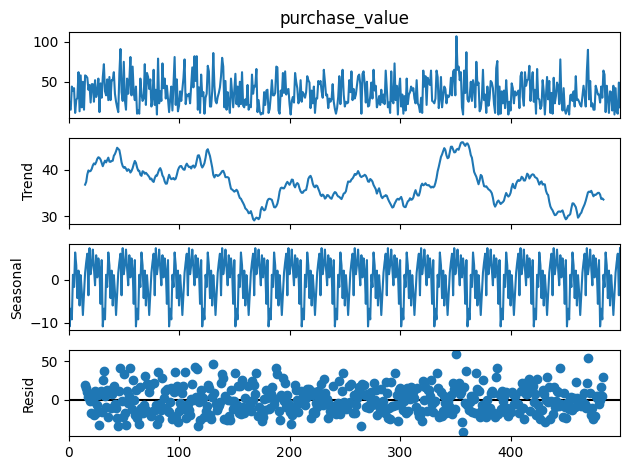

In [22]:
plots.timeseries_analysis(fraud_data, period=30, sample_size=100)

**Key insights**
- Trend: The data indicates periods of both increase and decrease, suggesting a seasonal component influencing the purchase_value fluctuations.
- Seasonality: The seasonal component highlights recurring patterns in the data. The plot reveals a distinct seasonal trend, with purchase_value rising during specific times of the month and falling at other times.

**Key take aways from timeseries analysis**
- The magnitude of the seasonal component suggests that the seasonal fluctuations are relatively large compared to the overall trend.
- The residuals show some clustering around certain values, which might indicate that there are still some patterns in the data that are not captured by the trend and seasonal components.

In [14]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   user_id               151112 non-null  int64         
 1   signup_time           151112 non-null  datetime64[ns]
 2   purchase_time         151112 non-null  datetime64[ns]
 3   purchase_value        151112 non-null  int64         
 4   device_id             151112 non-null  object        
 5   source                151112 non-null  object        
 6   browser               151112 non-null  object        
 7   sex                   151112 non-null  object        
 8   age                   151112 non-null  int64         
 9   ip_address            151112 non-null  int64         
 10  class                 151112 non-null  int64         
 11  Country               151112 non-null  object        
 12  Hour                  151112 non-null  int32         
 13 

In [21]:
# Categorical variables encoding
cat_col = ['Country', 'sex', 'browser', 'source']
fraud_data = pd.get_dummies(fraud_data, columns= cat_col)

In [22]:
## Saving the files:
fraud_data.to_csv('../data/Clean_FraudData.csv', index=False)
creditCard_data.to_csv('../data/Clean_creditCard_data.csv', index=False)